# Red Neuronal Recurrente

Crea una red neuronal para predecir el precio del dolar

In [1]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU

## 1. Leer la información del *dataset dolar.csv*

In [2]:
data = pd.read_csv('datasets/dolar.csv', header=None)
data

,0
0,17.0297
1,17.0492
2,17.0458
3,16.8987
4,16.8133
...,...
432,18.4082
433,18.3232
434,18.4312
435,18.4457


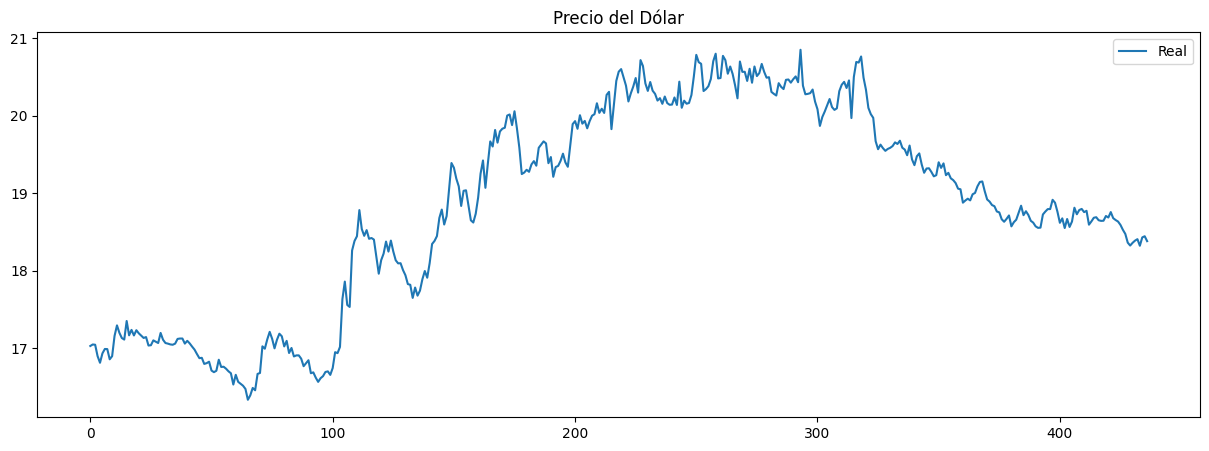

In [3]:
# Grafico de la serie de tiempo
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(data, label='Real')
plt.legend()

## 2. Crear secuencias temporales

In [4]:
# Normalización de los precios
prices = np.array(data[0])

normalizer = MinMaxScaler()
prices_norm = normalizer.fit_transform(prices.reshape(-1, 1))

# Crear datos de entrada y de salida, en base a secuencias
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(prices_norm, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

## 3. Crear Red Neuronal de Regresión

In [5]:
# Separar datos de entrada y de salida

X_nn = np.linspace(0, 1, len(prices_norm))

nn_model = Sequential([
    # Capa de entrada
    Input([1]),
    Dense(256, activation='relu'),

    # Capas ocultas
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Capa de salida
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_nn, prices_norm, epochs=100, batch_size=400)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.3818 - mae: 0.5473
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2776 - mae: 0.4551
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1433 - mae: 0.3055
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0609 - mae: 0.2090
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0911 - mae: 0.2271
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0659 - mae: 0.2111
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0549 - mae: 0.2036
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0655 - mae: 0.2126
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0672 - mae: 0.2141
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0586 - mae: 0.2076
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0529 - mae: 0.2030
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0580 - mae: 0.2093
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


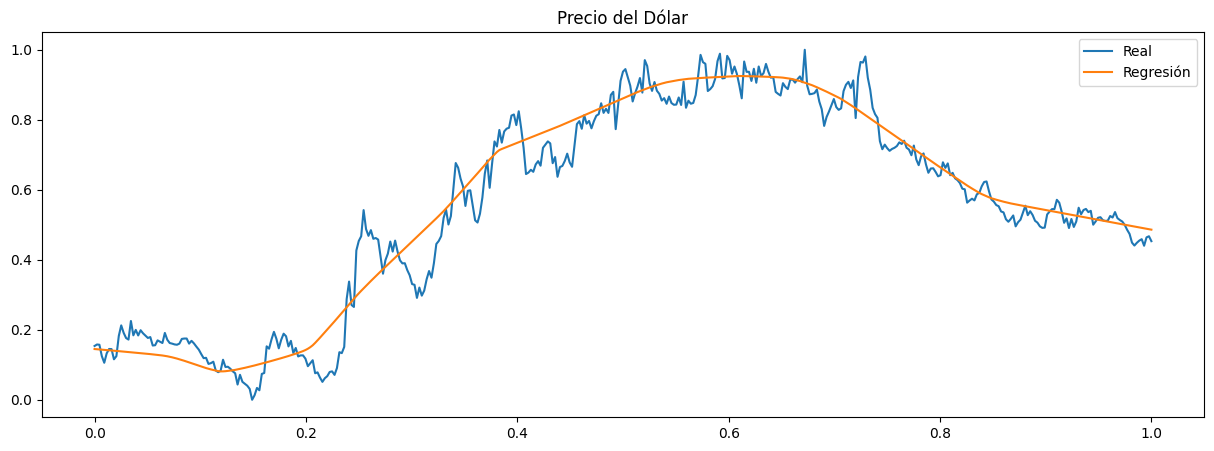

In [6]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.legend()

## 4. Crear Red Neuronal Recurrente Simple

In [7]:
rnn_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    SimpleRNN(256, return_sequences=True),

    # Capas ocultas
    SimpleRNN(128),

    # Capa de salida
    Dense(1, activation='linear')
])

rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.fit(X, y, epochs=50, batch_size=400) 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,457 (451.00 KB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3514 - mae: 0.5019
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2896 - mae: 0.5079
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0549 - mae: 0.2007
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0277 - mae: 0.1398
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0133 - mae: 0.0970
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0097 - mae: 0.0753
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0183 - mae: 0.1154
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0190 - mae: 0.1009
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134 - mae: 0.0986
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0074 - mae: 0.0708
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0062 - mae: 0.0635
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mae: 0.0740
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


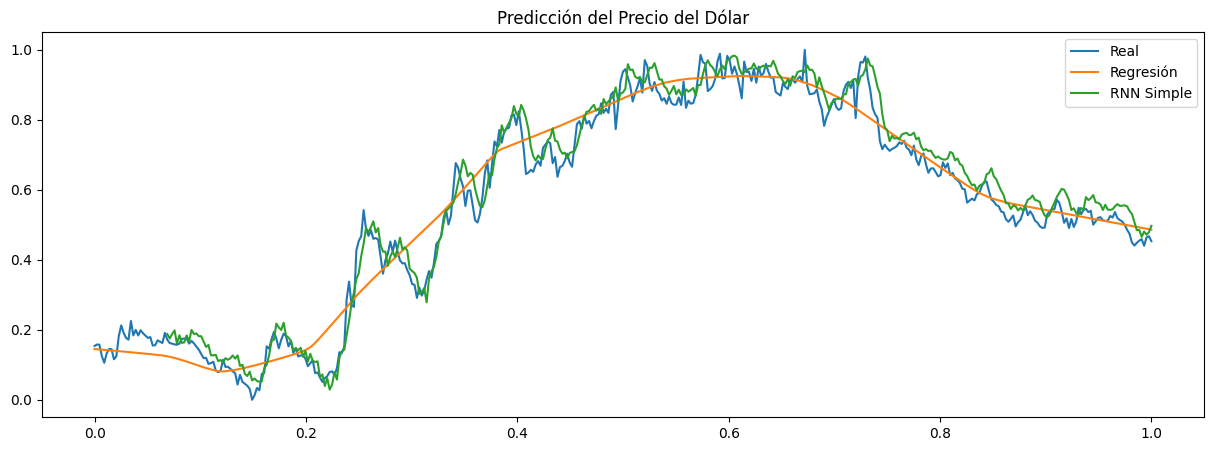

In [8]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Predicción del Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='RNN Simple')
plt.legend()

## 5. Crear Red Neuronal Recurrente LSTM

In [9]:
lstm_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    LSTM(256, return_sequences=True),

    # Capas ocultas
    LSTM(128),

    # Capa de salida
    Dense(1, activation='linear')
])

lstm_model.summary()

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,441 (1.76 MB)

 Trainable params: 461,441 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.3456 - mae: 0.5300
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0106 - mae: 0.0860 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0410 - mae: 0.1855 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0217 - mae: 0.1244 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0391 - mae: 0.1713 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0183 - mae: 0.1135 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0051 - mae: 0.0580 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0133 - mae: 0.1035 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0153 - mae: 0.1118 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0070 - mae: 0.0730 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0050 - mae: 0.0566 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0073 - mae: 0.0681 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


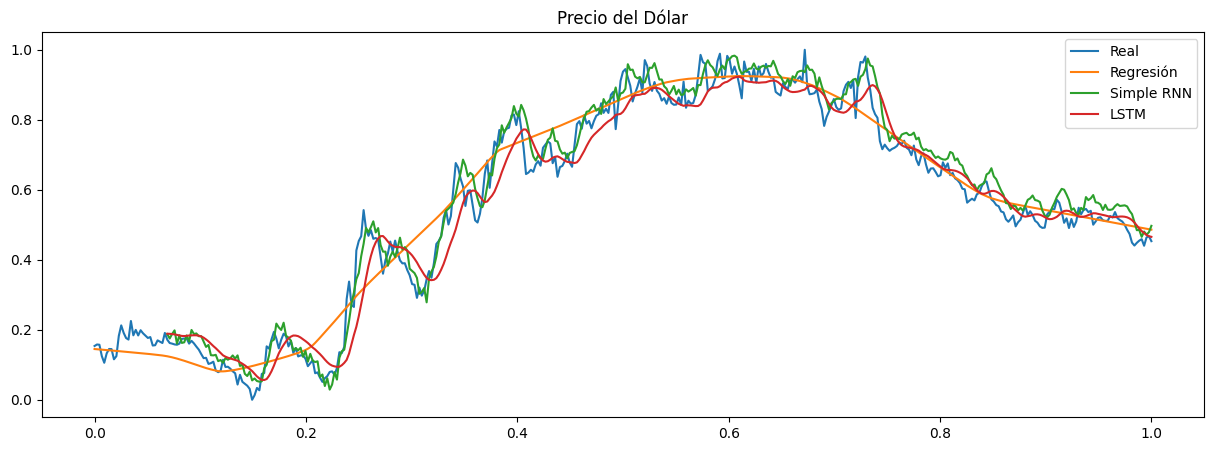

In [10]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='Simple RNN')
plt.plot(X_nn[time_steps:], lstm_model.predict(X), label='LSTM')
plt.legend()

## 6. Crear Red Neuronal Recurrente GRU

In [11]:
gru_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    GRU(256, return_sequences=True),

    # Capas ocultas
    GRU(128),

    # Capa de salida
    Dense(1, activation='linear')

])
gru_model.summary()

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,265 (1.32 MB)

 Trainable params: 347,265 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.3624 - mae: 0.5418
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0065 - mae: 0.0649 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1277 - mae: 0.3429 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0172 - mae: 0.1232 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0145 - mae: 0.1023 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0472 - mae: 0.1907 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0511 - mae: 0.1990 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0314 - mae: 0.1540 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0100 - mae: 0.0845 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0030 - mae: 0.0450 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0108 - mae: 0.0967 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0170 - mae: 0.1236 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


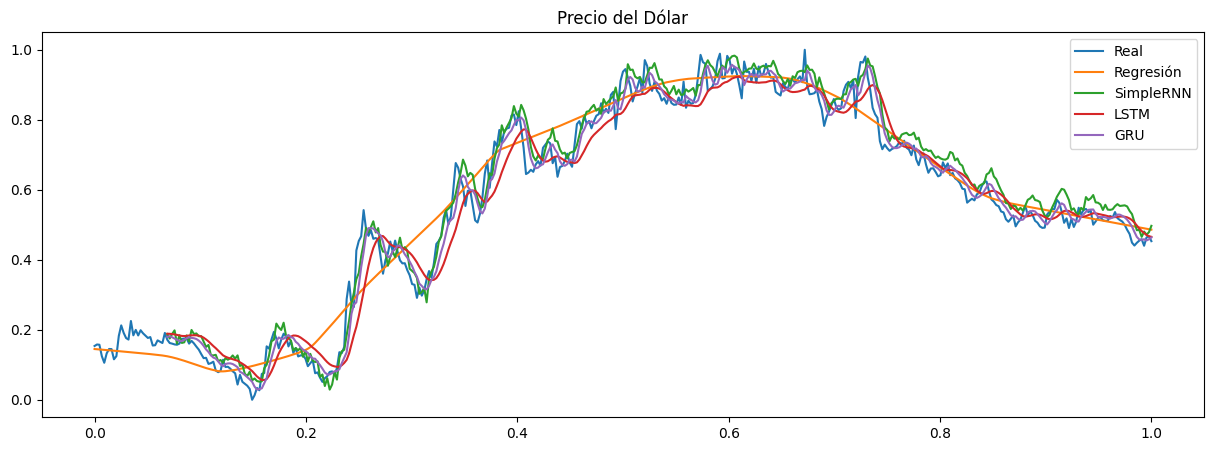

In [12]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='SimpleRNN')
plt.plot(X_nn[time_steps:], lstm_model.predict(X), label='LSTM')
plt.plot(X_nn[time_steps:], gru_model.predict(X), label='GRU')
plt.legend()

## 7. Predecir el futuro

In [13]:
def next_time(model):
    Y = model.predict(prices_norm[-time_steps:].reshape(1, time_steps, 1))
    return normalizer.inverse_transform(Y.reshape(-1, 1))

def error(model, X, y):
    loss, mae = model.evaluate(X, y)
    normalizer.inverse_transform(np.array(mae).reshape(-1, 1))
    return f' con un error de +- {mae}'

print('En el siguiente paso de tiempo, el precio del dolar será de: ')
print(f' -> Regresión: ${normalizer.inverse_transform(nn_model(X_nn[1:2] + 1))[0, 0]}' + error(nn_model, X_nn, prices_norm))
print(f' -> RNN Simple: ${next_time(rnn_model)[0, 0]}' + error(rnn_model, X, y))
print(f' -> LSTM: ${next_time(lstm_model)[0, 0]}' + error(lstm_model, X, y))
print(f' -> GRU: ${next_time(gru_model)[0, 0]}' + error(gru_model, X, y))

En el siguiente paso de tiempo, el precio del dolar será de: 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mae: 0.0455  
 -> Regresión: $18.525226998916267 con un error de +- 0.04547131806612015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021 - mae: 0.0377
 -> RNN Simple: $18.561643600463867 con un error de +- 0.03774392232298851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - mae: 0.0449
 -> LSTM: $18.432418823242188 con un error de +- 0.04491805657744408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016 - mae: 0.0296
 -> GRU: $18.428497314453125 con un error de +- 0.0295756496489048


In [16]:
time_steps = 5
nn_future = nn_model.predict(X_nn[:time_steps] + 1)

def future(model, X, time_steps=5):
    Y = []
    for i in range(time_steps):
        predict = model.predict(X[-time_steps:].reshape(1, time_steps, 1))
        X = np.append(X, predict[0, 0])
        Y.append(predict[0, 0])

    return np.array(Y)

rnn_future = future(rnn_model, prices_norm.copy(), time_steps)
lstm_future = future(lstm_model, prices_norm.copy(), time_steps)
gru_future = future(gru_model, prices_norm.copy(), time_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


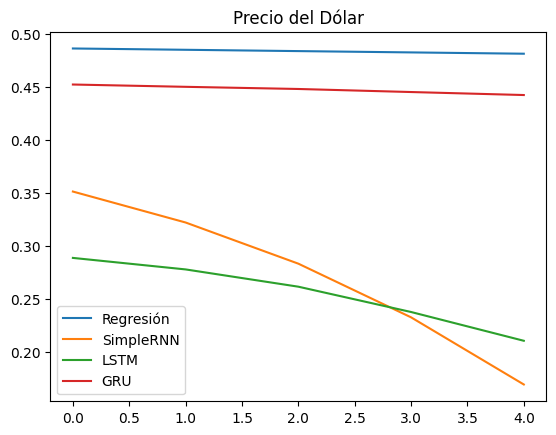

In [17]:
# Visualizar predicción
plt.title('Precio del Dólar')
plt.plot(nn_future, label = 'Regresión')
plt.plot(rnn_future, label = 'SimpleRNN')
plt.plot(lstm_future, label = 'LSTM')
plt.plot(gru_future, label = 'GRU')
plt.legend()